In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm

Using TensorFlow backend.


In [2]:

def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [3]:
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\montecarlo_lab_omp.csv')

In [4]:
df.head()

,sys,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,...,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,PS,runtime,bus_speed
0,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,2,100000,5.236720e+05,2048
1,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,2,500000,2.754203e+06,2048
2,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,2,1000000,5.441481e+06,2048
3,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,2,5000000,2.749909e+07,2048
4,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,3,100000,5.441035e+05,2048


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 23 columns):
sys                      224 non-null object
arch                     224 non-null object
cpu-clock                224 non-null float64
isa                      224 non-null object
l1d_assoc                224 non-null int64
l1d_cache_lines          224 non-null int64
l1d_shared_by_threads    224 non-null int64
l1d_size                 224 non-null int64
l2_assoc                 224 non-null int64
l2_cache_lines           224 non-null int64
l2_shared_by_threads     224 non-null int64
l2_size                  224 non-null int64
l3_assoc                 224 non-null int64
l3_cache_lines           224 non-null int64
l3_shared_by_threads     224 non-null int64
l3_size                  224 non-null int64
mem-size                 224 non-null int64
mem-type                 224 non-null object
mem_clock                224 non-null int64
num-cpus                 224 non-null int64
PS       

In [6]:
df.columns, len(df.columns)

(Index(['sys', 'arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'PS', 'runtime', 'bus_speed'],
       dtype='object'), 23)

In [7]:
len(df)

224

In [8]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [9]:
encoded_data_frame.head()

,sys,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,bus_speed
0,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,2,100000,5.236720e+05,2048
1,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,2,500000,2.754203e+06,2048
2,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,2,1000000,5.441481e+06,2048
3,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,2,5000000,2.749909e+07,2048
4,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,3,100000,5.441035e+05,2048


In [10]:
encoded_data_frame.columns

Index(['sys', 'arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
       'bus_speed'],
      dtype='object')

In [11]:
total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])

In [12]:
total_data.columns

Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
       'bus_speed'],
      dtype='object')

In [13]:
total_data = total_data.fillna(0)
temp = total_data
#.drop(columns = 'PS')

In [14]:
X_columns = total_data.drop(columns = 'runtime').columns
X = total_data.drop(columns = ['runtime']).to_numpy()
Y = total_data['runtime'].to_numpy()

In [15]:
X_columns

Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'bus_speed'],
      dtype='object')

In [16]:
X.shape, Y.shape

((224, 22), (224,))

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((179, 22), (45, 22), (179,), (45,))

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Y_train = scaler.fit_transform(Y_train)
# Y_test = scaler.fit_transform(Y_test)

# Histogram Visualization of Dataset

C:\Users\Rajat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

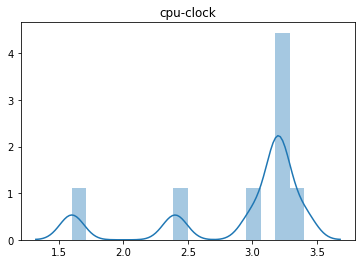

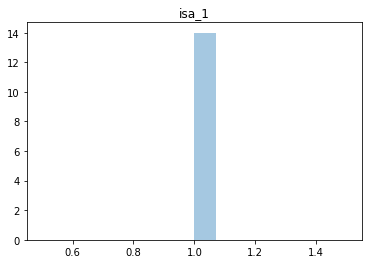

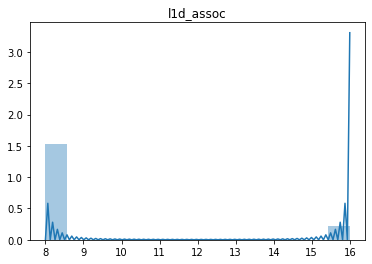

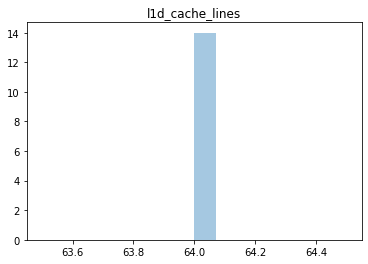

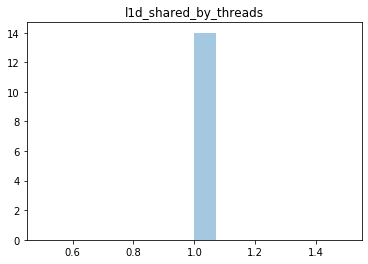

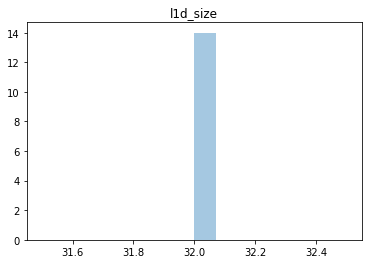

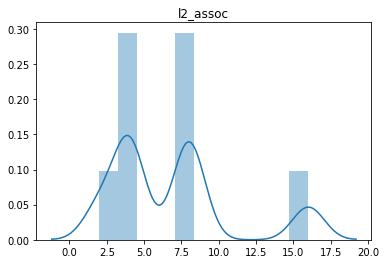

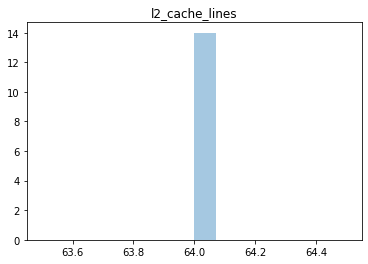

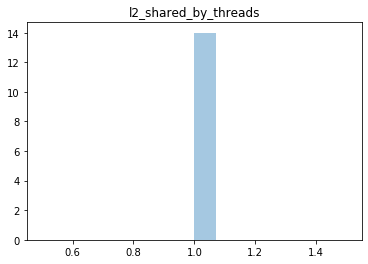

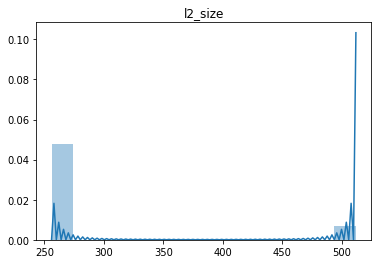

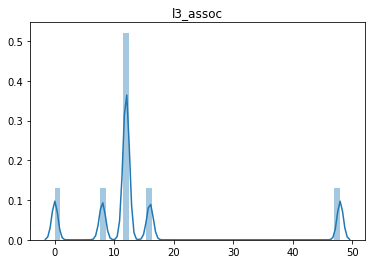

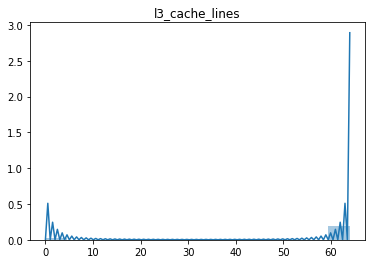

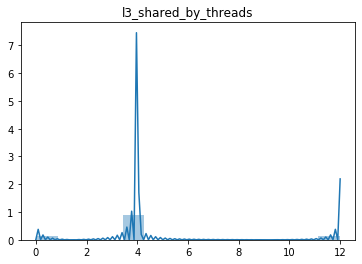

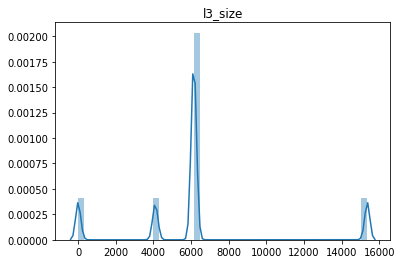

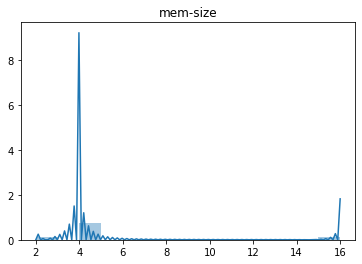

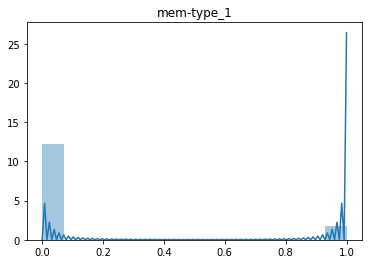

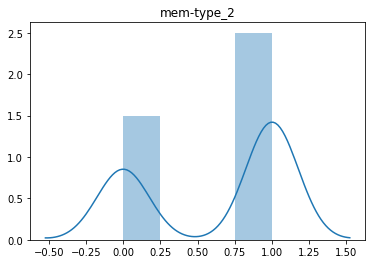

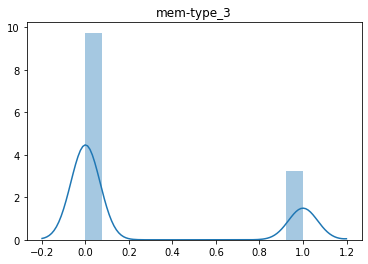

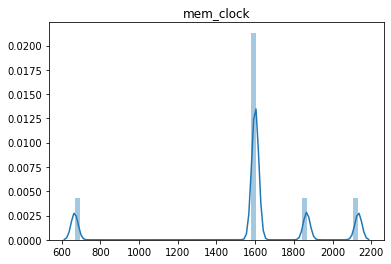

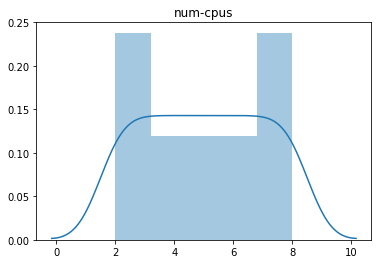

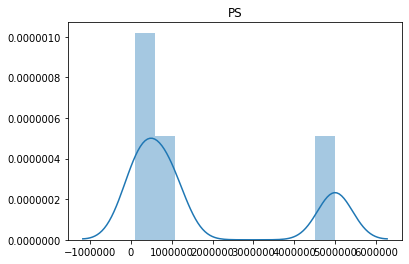

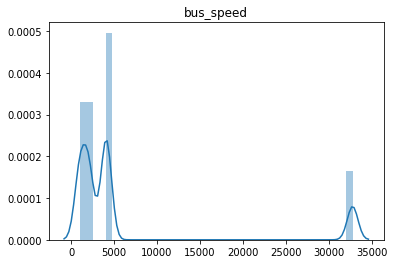

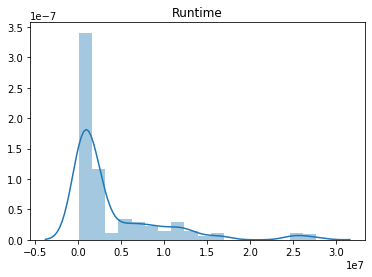

In [20]:
for i in range(X.shape[1]):
    plt.figure()
    plt.title(X_columns[i])
    sns.distplot(X[:,i]) # Also plots Gaussian KDE over data
plt.figure()
plt.title('Runtime')
sns.distplot(Y)

# Understanding Correlations

In [22]:
temp.head(100)

,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,bus_speed
0,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,2,100000,5.236720e+05,2048
1,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,2,500000,2.754203e+06,2048
2,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,2,1000000,5.441481e+06,2048
3,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,2,5000000,2.749909e+07,2048
4,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,3,100000,5.441035e+05,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.4,1,8,64,1,32,8,64,1,256,...,15360,16,0,0,1,1866,4,5000000,1.465971e+07,32768
96,2.4,1,8,64,1,32,8,64,1,256,...,15360,16,0,0,1,1866,5,100000,3.324129e+05,32768
97,2.4,1,8,64,1,32,8,64,1,256,...,15360,16,0,0,1,1866,5,500000,1.667455e+06,32768
98,2.4,1,8,64,1,32,8,64,1,256,...,15360,16,0,0,1,1866,5,1000000,3.311211e+06,32768


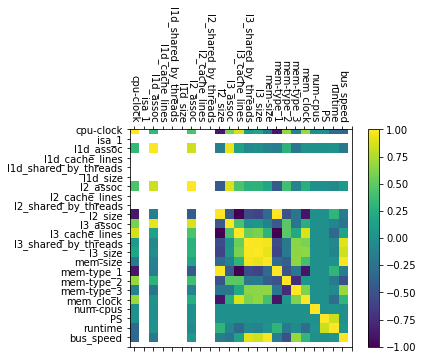

<Figure size 1440x1080 with 0 Axes>

In [23]:
train_data = temp
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,24,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
plt.figure(figsize=(20,15))
plt.show()

In [24]:
correlations

,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,bus_speed
cpu-clock,1.000000e+00,NaN,0.334077,NaN,NaN,NaN,0.440275,NaN,NaN,-0.868599,...,0.176227,-0.182553,-0.868599,0.684653,-0.102062,0.700652,0.000000,9.373682e-19,-0.313208,-0.324443
isa_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_assoc,3.340766e-01,NaN,1.000000,NaN,NaN,NaN,0.849509,NaN,NaN,-0.142857,...,-0.012155,-0.114799,-0.142857,0.292770,-0.218218,0.016191,0.000000,0.000000e+00,0.020486,-0.202326
l1d_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_assoc,4.402752e-01,NaN,0.849509,NaN,NaN,NaN,1.000000,NaN,NaN,-0.436234,...,0.291064,0.180812,-0.436234,0.392112,-0.105215,0.256223,0.000000,0.000000e+00,-0.047538,0.069680
l2_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_size,-8.685990e-01,NaN,-0.142857,NaN,NaN,NaN,-0.436234,NaN,NaN,1.000000,...,-0.595571,-0.298476,1.000000,-0.487950,-0.218218,-0.885688,0.000000,0.000000e+00,0.307995,-0.163787


In [26]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

# 1. Support Vector Regressor + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.133, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.213, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.269, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.133, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.213, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.269, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.133, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.213, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.269, total=   0.0s
[CV] C

[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.269, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ........ C=1000, gamma=1, kernel=rbf, score=-0.132, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ........ C=1000, gamma=1, kernel=rbf, score=-0.212, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ........ C=1000, gamma=1, kernel=rbf, score=-0.268, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ...... C=1000, gamma=0.1, kernel=rbf, score=-0.130, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ...... C=1000, gamma=0.1, kernel=rbf, score=-0.211, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ...... C=1000, gamma=0.1, kernel=rbf, score=-0.266, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE =  34949564201065.004
R2 score = -0.19265650600733975
Mean Absolute Percentage Error is: 2.3130859416283904
Mean Absolute Error is: 3367925.6874185223


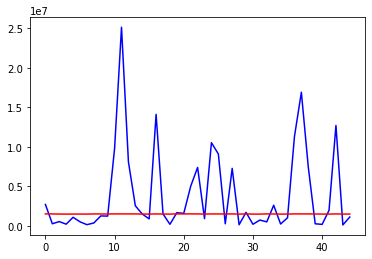

In [27]:
from sklearn.svm import SVR
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              # Regularization parameter. The strength of the regularization is inversely proportional to C. 
              # Must be strictly positive. The penalty is a squared l2 penalty.
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
              # if ‘auto’, uses 1 / n_features.
              
              'kernel': ['rbf']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred)) 
print('Mean Absolute Percentage Error is:',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))


# 10 fold cross validation for best SVR

KFold(n_splits=10, random_state=42, shuffle=True)
(201, 22) (23, 22) (201,) (23,)
(201, 22) (23, 22) (201,) (23,)
(201, 22) (23, 22) (201,) (23,)
(201, 22) (23, 22) (201,) (23,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
MSE for 10 folds
 [38892825784934.21, 30523621726719.824, 33780069483782.125, 17830681461542.92, 8569776858517.02, 57980756284252.0, 76598901566265.72, 53092391415615.88, 23646812824653.5, 42731873964205.88]

R2 scores for 10 folds
 [-0.16380171794302045, -0.27005077462736793, -0.1117971572876979, -0.16099665153374043, -0.1013165795259987, -0.10411919055472874, -0.4174438555015427, -0.3289071561820285, -0.10685132772029449, -0.4426934289251794]

MAPE for 10 folds
 [1.7805448991292594, 2.744901134871307, 2.0797989997359454, 2.5999556823022645, 2.53027041747635, 2.299802300693699, 1.261998039221053, 1.5685593570430851, 2.291

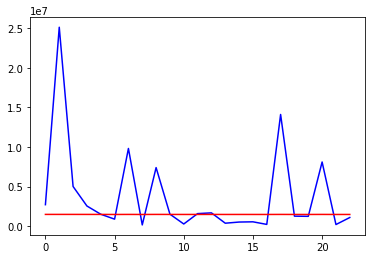

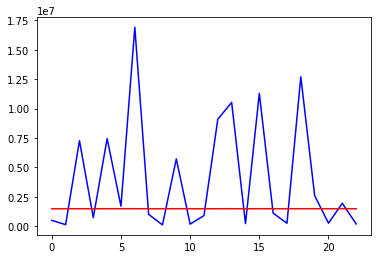

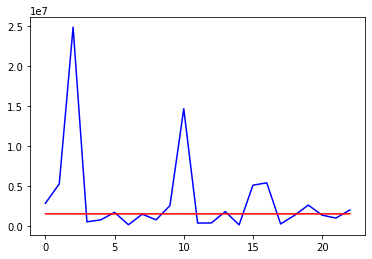

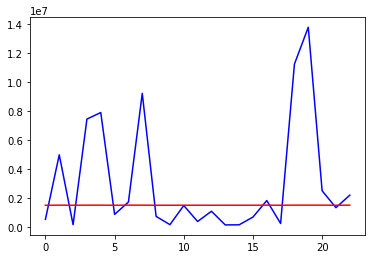

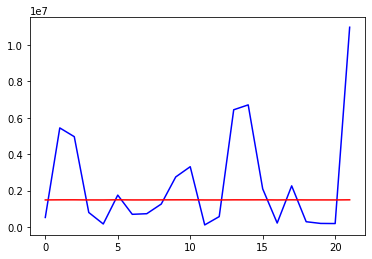

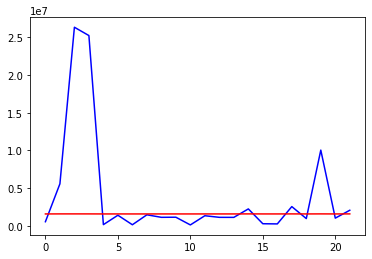

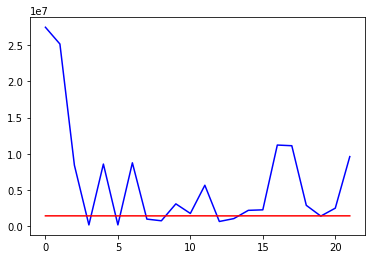

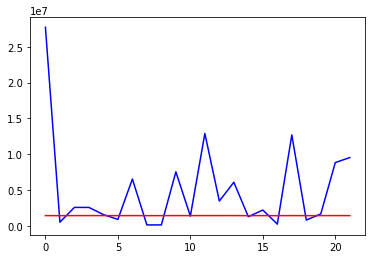

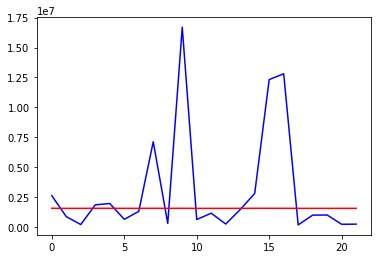

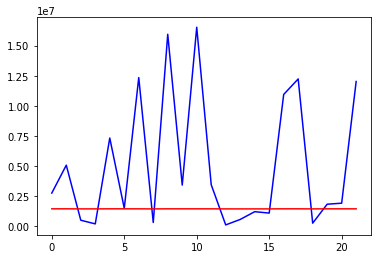

In [28]:
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
from sklearn.svm import SVR
best_svr = SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    best_svr.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = best_svr.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# SVR Analysis

## 0. Our best fit line is the line hyperplane that has maximum number of points. (SVR)
## 1. For linear kernel - Data should be linearly seperable - How to know this? - IF not working well, 
## 2. data must be linearly inseperable? 
## 3. C = 1000,-> Less Regularization was needed
## gamma = 0.1 -> Kernel Coefficient ,  rest default
## 4. SVM performs worse on highly skewed datasets (Can be seen by histograms)
## 5. Logistic regression works well on skewed datasets. (But this is a regression problem and logistic regression works great with classificaton problem)
## 6. How to prove whether given dataset is skewed and not linearly separable?
## 7. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

# 5. Gaussian Process Regressor (Marcov Chain Monte Carlo) + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.990, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.733, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.807, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.971, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.670, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.653, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.990, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.733, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.807, total=   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 1e-10, 'normalize_y': True}
GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
MSE =  564954804720.4205
R2 score = 0.9807208748133865

Mean Absolute Percentage Error = 0.5005688904677856
Mean Absolute Error is: 455708.3539791336


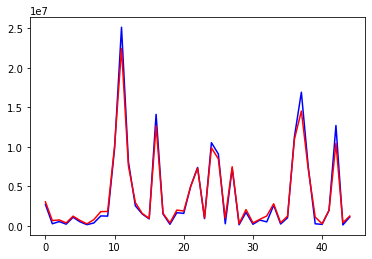

In [29]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0 , 
                               normalize_y= True, copy_X_train=True, random_state= None)
# defining parameter range 
param_grid = {'alpha': [1e-10, 1e-9, 1e-5, 1e-2],  
             'normalize_y' : [True, False],
                         } 
grid = GridSearchCV(gpr, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Gaussian Process Regressor

KFold(n_splits=10, random_state=42, shuffle=True)
(201, 22) (23, 22) (201,) (23,)
(201, 22) (23, 22) (201,) (23,)
(201, 22) (23, 22) (201,) (23,)
(201, 22) (23, 22) (201,) (23,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
MSE for 10 folds
 [2103264037276.21, 3634318519522.4395, 1593765857263.3362, 1629349492485.6248, 833603195783.0344, 4482427802867.478, 9172050401220.191, 1489945900837.449, 1853781602233.507, 4870236963720.391]

R2 scores for 10 folds
 [0.9370633979283136, 0.8487804267695566, 0.9475446801452472, 0.8939093096899327, 0.8928722374668013, 0.9146417729848365, 0.8302734606146673, 0.9627065250376988, 0.9132288717743644, 0.8355733504513884]

MAPE for 10 folds
 [1.007124847916267, 1.5342054181204399, 2.529327990003232, 2.730481651682849, 1.4555047023616445, 1.0451863836980764, 1.017585035541873, 0.8913701002193417, 2.13959228358855

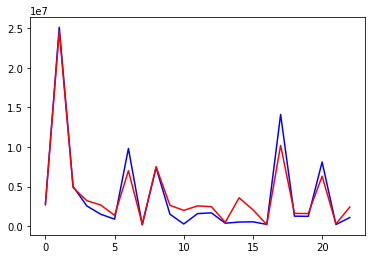

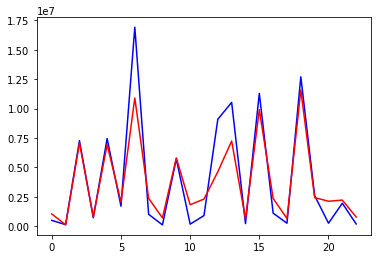

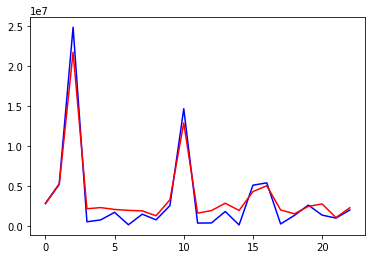

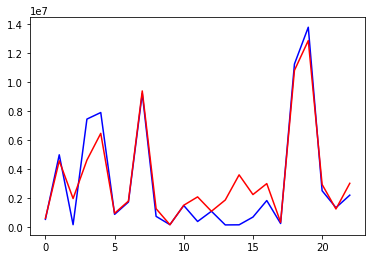

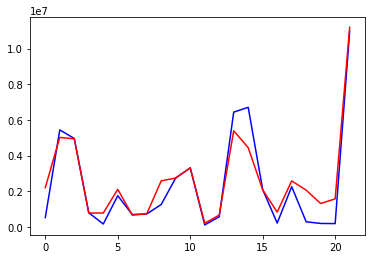

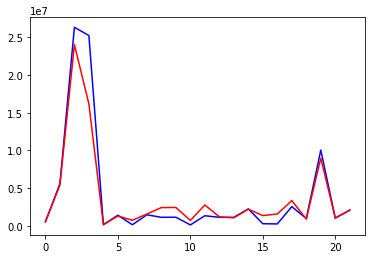

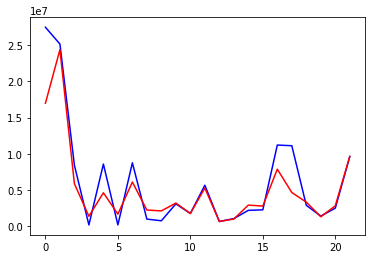

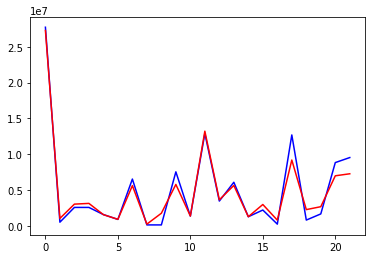

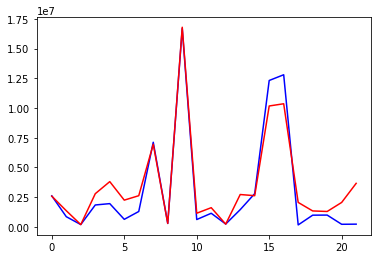

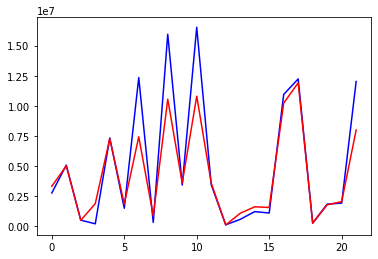

In [30]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr_best = GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state = 42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    gpr_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = gpr_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 9. Gradient boosting regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 336 candidates, totalling 1008 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.831, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.816, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.759, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.956, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.933, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.932, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.992, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.964, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimato

[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=20, score=0.969, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.985, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.992, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.981, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.985, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.992, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, 

[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=50, score=0.923, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.984, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.779, total=   0.3s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.959, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.636, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.393, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5,

[CV]  criterion=mse, loss=lad, max_depth=15, n_estimators=100, score=0.918, total=   0.9s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.665, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.394, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.651, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.846, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.539, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad

[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=10 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=10, score=0.854, total=   0.1s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.976, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.697, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.949, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.986, total=   0.6s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.737, total=   0.6s
[CV] criterion=mse, loss=huber, ma

[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.870, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.701, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.811, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.965, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.910, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=100 .....
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=100, score=0.863, total=   0.1s
[CV] criterion=

[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=20, score=0.740, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.897, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.951, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.939, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.944, total=   0.4s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.958, total=   0.5s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  cr

[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.988, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.986, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.984, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.989, total=   0.3s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.987, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.985, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=5, n_estimators=10

[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.992, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.978, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.985, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.992, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.978, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10 
[CV]  criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10, score=0.860, t

[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.735, total=   0.1s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.947, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.989, total=   0.3s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.756, total=   0.3s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.956, total=   0.4s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10, score=0.651, total=   0.0s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estima

[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.719, total=   0.3s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.908, total=   0.3s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.978, total=   0.9s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.840, total=   1.0s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.912, total=   0.8s
[CV] criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10, score=0.850, total=   0.0s
[CV] criterion=friedman_mse, loss=hu

[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.750, total=   0.6s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.959, total=   0.6s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.990, total=   1.1s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.766, total=   1.1s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.960, total=   1.1s
[CV] criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10, score=0.849, total=   0.2s
[CV] criterion=friedman_mse, loss=huber, ma

[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.811, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.965, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.910, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.863, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.976, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.946, total=   0.2s
[CV] criteri

[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.862, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.740, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.899, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.951, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.939, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100, score=0.945, total=   0.5s
[CV] 

[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.967, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.963, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.951, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.990, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.985, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.983, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=100 ...........
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimat

[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.992, total=   0.3s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.978, total=   0.3s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.985, total=   0.5s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.992, total=   0.5s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.978, total=   0.5s
[CV] criterion=mae, loss=ls, max_depth=None, n_estimators=10 .........
[CV]  criterion=mae, loss=ls, max_depth=None, n_estimators=10, score=0.860, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=No

[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.915, total=   0.6s
[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.931, total=   0.7s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.773, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.368, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.242, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=20 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=20, score=0.939, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n

[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.481, total=   0.0s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.776, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.972, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.677, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.860, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=50 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=50, score=0.990, total=   0.2s
[CV] criterion=mae, loss=huber, ma

[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.979, total=   0.4s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.941, total=   0.5s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.944, total=   0.4s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.987, total=   1.2s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.965, total=   1.1s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.943, total=   1.1s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=100 .......
[CV]  criterion=mae, loss=hu

[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=20, score=0.165, total=   0.1s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.178, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.830, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.477, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.275, total=   0.4s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.856, total=   0.4s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterio

[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.887, total=   0.4s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.846, total=   0.3s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.731, total=   0.9s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.946, total=   0.8s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.880, total=   0.8s
[CV] criterion=mae, loss=quantile, max_depth=None, n_estimators=10 ...
[CV]  criterion=mae, loss=quantile, max_depth=None, n_estimators=10, score=-0.787, total=   0.1s
[CV]

[Parallel(n_jobs=1)]: Done 1008 out of 1008 | elapsed:  4.8min finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'loss': 'ls', 'max_depth': 5, 'n_estimators': 100}
GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE =  106479818853.06346
R2 score = 0.9963663681760667

Mean Absolute Percentage Error = 0.046872086679478196
Mean Absolute Error is: 158887.27426433144


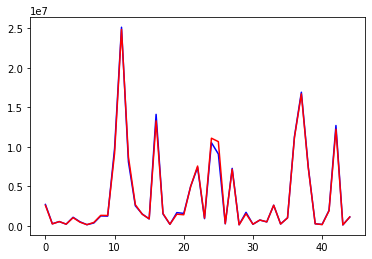

In [31]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                                         subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                         min_impurity_decrease=0.0, min_impurity_split=None, 
                                         init=None, random_state= 42, max_features=None, 
                                         alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                         warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                                         tol=0.0001)
# defining parameter range
param_grid = {'n_estimators' : [10, 20, 50, 100],
              
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
             }
'''param_grid = {'n_estimators' : [10, 20, 50, 100],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15 None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 20,50, 100], 
              'warm_start': ['True', 'False'],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'validation_fraction': [0.2, 0.1, 0.3, 0.4]
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best GBR

KFold(n_splits=10, random_state=42, shuffle=True)
(201, 22) (23, 22) (201,) (23,)
(201, 22) (23, 22) (201,) (23,)
(201, 22) (23, 22) (201,) (23,)
(201, 22) (23, 22) (201,) (23,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
(202, 22) (22, 22) (202,) (22,)
MSE for 10 folds
 [145969220083.72498, 182506120654.1259, 128353445018.75314, 196632835039.0659, 60602411992.955986, 93650654702.88182, 50480896582.57069, 51641850963.87956, 19542916462.614025, 234090471796.9967]

R2 scores for 10 folds
 [0.995632119146096, 0.992406142299028, 0.9957755268866915, 0.9871967841748328, 0.9922118811039081, 0.9982166240716396, 0.9990658634103353, 0.9987073999969759, 0.9990852423455723, 0.9920967476006689]

MAPE for 10 folds
 [0.04007747130227457, 0.04188714486929423, 0.03683005206424295, 0.047851927058499506, 0.06020504799300204, 0.028940592929129552, 0.03494671318015074, 0.030922123281091184, 0

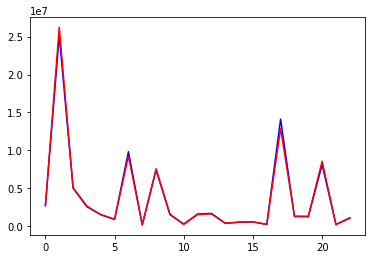

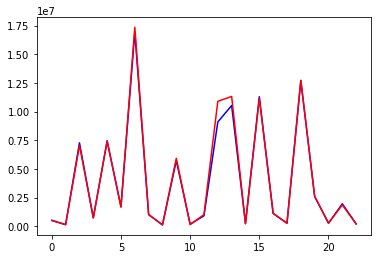

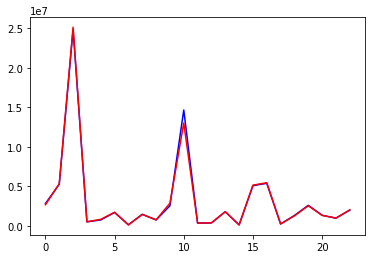

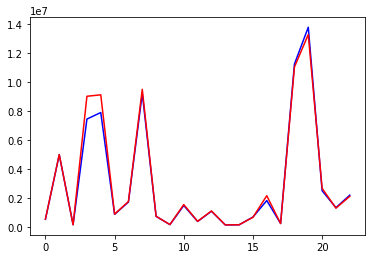

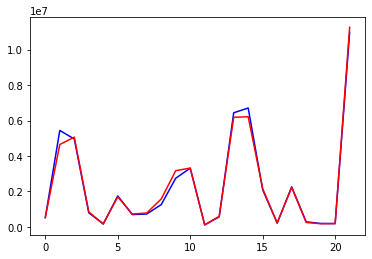

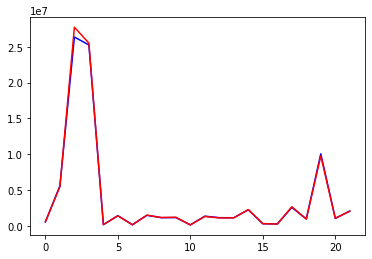

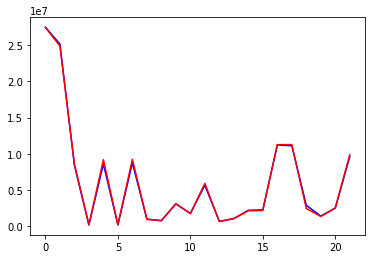

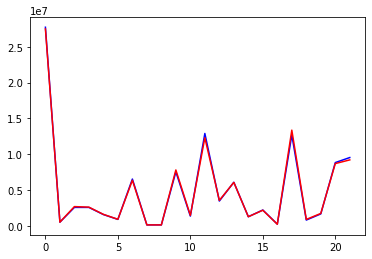

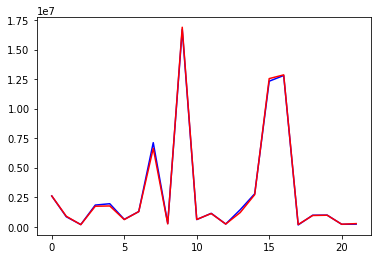

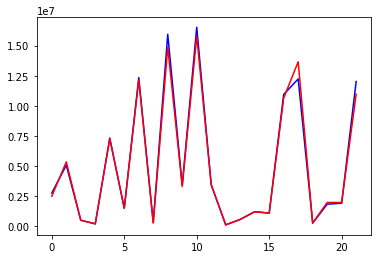

In [32]:
from sklearn import ensemble
reg_best = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 10. XGB Boost + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[19:43:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.406, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[19:43:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.127, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[19:43:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.139, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[19:43:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.613, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[19:43:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.384, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators

[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.568, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[19:43:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.342, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[19:43:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.424, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................
[19:43:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimator

[19:43:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=20, score=0.381, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[19:43:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.748, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[19:43:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.582, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[19:43:38] WARNING: C:/Jenkins/workspace/xgboo

[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.965, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[19:43:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.926, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[19:43:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.948, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[19:43:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimator

[19:43:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.901, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[19:43:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.982, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[19:43:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.935, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[19:43:40] WARNING: C:/Jenkins/workspace/xgboos

[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[19:43:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.919, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[19:43:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.915, total=   0.0s
[CV] learning_rate=0.5, max_depth=15, n_estimators=10 ................
[19:43:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10, score=0.816, total=   0.0s
[CV] learning_rate=0.5, max_depth=15, n_esti

[19:43:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, score=0.005, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[19:43:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-0.342, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[19:43:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-0.358, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[19:43:42] WARNING: C:/Jenkins/workspace/xg

[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-0.345, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[19:43:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-0.361, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[19:43:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-0.533, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=20 ................
[19:43:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_es

[19:43:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=10, score=-0.533, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[19:43:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-0.199, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[19:43:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-0.281, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[19:43:43] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-0.482, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[19:43:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-0.424, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[19:43:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-0.647, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=50 ...............
[19:43:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, 

[19:43:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=20, score=-0.647, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[19:43:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-0.431, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[19:43:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-0.398, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[19:43:45] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-0.431, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[19:43:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-0.398, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[19:43:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-0.605, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=100 .............
[19:43:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=

[19:43:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=50, score=-0.671, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[19:43:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-0.503, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[19:43:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-0.433, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[19:43:47] WARNING: C:/Jenkins/work

[19:43:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-0.503, total=   0.0s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[19:43:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-0.434, total=   0.0s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[19:43:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-0.664, total=   0.0s
[CV] learning_rate=0.0001, max_depth=10, n_estimators=10 .............
[19:43:47] WARNING: C:/Jenkins/wor

[19:43:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-0.434, total=   0.0s
[CV] learning_rate=0.0001, max_depth=15, n_estimators=100 ............
[19:43:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-0.664, total=   0.0s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   11.6s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[19:43:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
MSE =  371394469699.3913
R2 score = 0.9873261357986082

Mean Absolute Percentage Error = 0.44157778703799266
Mean Absolute Error is: 417368.18368638895


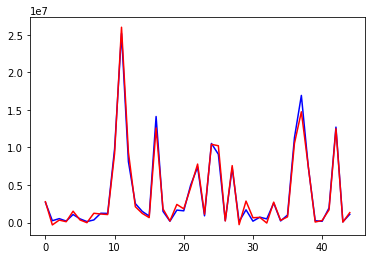

In [33]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg = xgb.XGBRegressor(booster = 'gbtree',validate_parameters = False,  
                objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# defining parameter range 
param_grid = {'n_estimators' : [10, 20, 50, 100], 
              'max_depth': [3,4,5,7,10,15],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001]      
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# # 10 fold cross validation for best XGB 

KFold(n_splits=10, random_state=42, shuffle=True)
(201, 22) (23, 22) (201,) (23,)
[19:44:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(201, 22) (23, 22) (201,) (23,)
[19:44:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(201, 22) (23, 22) (201,) (23,)
[19:44:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(201, 22) (23, 22) (201,) (23,)
[19:44:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(202, 22) (22, 22) (202,) (22,)
[19:44:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated 

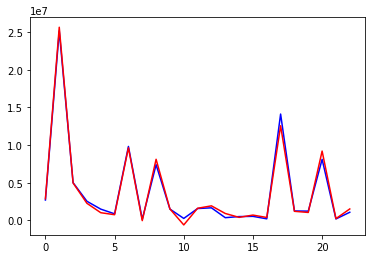

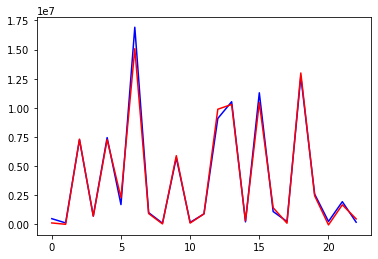

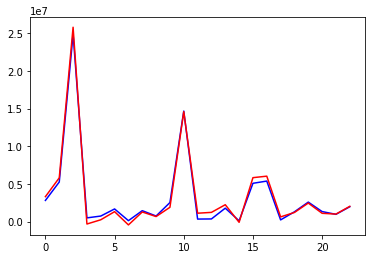

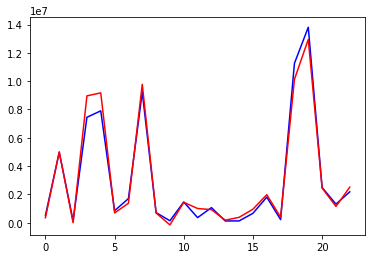

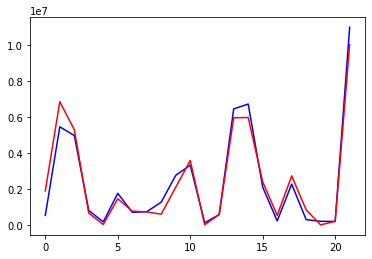

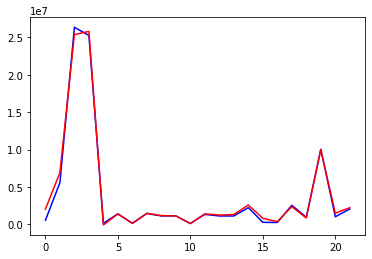

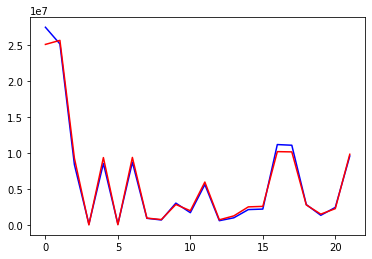

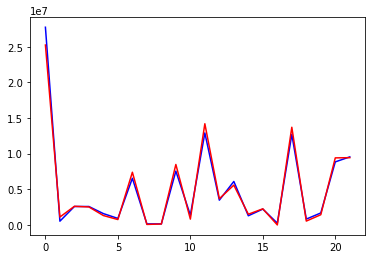

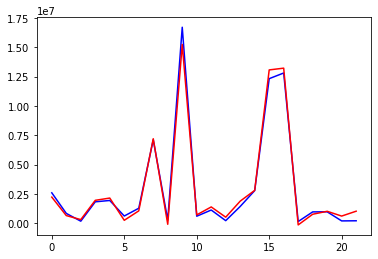

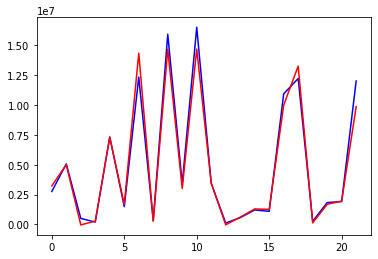

In [34]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg_best = xgb.XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# 11. DNN_1

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               11776     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(201, 22) (23, 22) (201,) (23,)
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 3736001.2954 - mae: 3736001.0000
Epoch 2/100
 - 0s - loss: 2860936.4684 - mae: 2860936.2500
Epoch 3/100
 - 0s - loss: 1894206.9652 - mae: 1894206.8750
Epoch 4/100
 - 0s - loss: 1456553.4285 - mae: 1456553.5000
Epoch 5/10

Epoch 15/100
 - 0s - loss: 1432550.2136 - mae: 1432550.3750
Epoch 16/100
 - 0s - loss: 1433780.6461 - mae: 1433780.5000
Epoch 17/100
 - 0s - loss: 1429501.4190 - mae: 1429501.5000
Epoch 18/100
 - 0s - loss: 1433258.7994 - mae: 1433258.6250
Epoch 19/100
 - 0s - loss: 1433444.4080 - mae: 1433444.5000
Epoch 20/100
 - 0s - loss: 1428236.9928 - mae: 1428237.0000
Epoch 21/100
 - 0s - loss: 1446702.3459 - mae: 1446702.5000
Epoch 22/100
 - 0s - loss: 1434374.3442 - mae: 1434374.3750
Epoch 23/100
 - 0s - loss: 1436171.6353 - mae: 1436171.5000
Epoch 24/100
 - 0s - loss: 1435563.1774 - mae: 1435563.2500
Epoch 25/100
 - 0s - loss: 1432725.8123 - mae: 1432725.7500
Epoch 26/100
 - 0s - loss: 1456294.0487 - mae: 1456293.7500
Epoch 27/100
 - 0s - loss: 1437001.5456 - mae: 1437001.5000
Epoch 28/100
 - 0s - loss: 1430502.6771 - mae: 1430502.5000
Epoch 29/100
 - 0s - loss: 1440362.1710 - mae: 1440362.3750
Epoch 30/100
 - 0s - loss: 1438505.9736 - mae: 1438505.8750
Epoch 31/100
 - 0s - loss: 1445433.8225 

Epoch 50/100
 - 0s - loss: 1349293.2879 - mae: 1349293.2500
Epoch 51/100
 - 0s - loss: 1361506.9478 - mae: 1361506.8750
Epoch 52/100
 - 0s - loss: 1341722.3158 - mae: 1341722.3750
Epoch 53/100
 - 0s - loss: 1351591.7935 - mae: 1351591.7500
Epoch 54/100
 - 0s - loss: 1354118.6202 - mae: 1354118.5000
Epoch 55/100
 - 0s - loss: 1355159.7996 - mae: 1355159.7500
Epoch 56/100
 - 0s - loss: 1348754.0467 - mae: 1348754.1250
Epoch 57/100
 - 0s - loss: 1350096.0201 - mae: 1350096.1250
Epoch 58/100
 - 0s - loss: 1349676.4745 - mae: 1349676.3750
Epoch 59/100
 - 0s - loss: 1364961.4073 - mae: 1364961.3750
Epoch 60/100
 - 0s - loss: 1395967.4602 - mae: 1395967.3750
Epoch 61/100
 - 0s - loss: 1368025.7666 - mae: 1368025.6250
Epoch 62/100
 - 0s - loss: 1367717.5533 - mae: 1367717.6250
Epoch 63/100
 - 0s - loss: 1367029.6993 - mae: 1367029.5000
Epoch 64/100
 - 0s - loss: 1358264.2491 - mae: 1358264.2500
Epoch 65/100
 - 0s - loss: 1349879.9686 - mae: 1349879.8750
Epoch 66/100
 - 0s - loss: 1348787.5485 

Epoch 85/100
 - 0s - loss: 1417601.5581 - mae: 1417601.6250
Epoch 86/100
 - 0s - loss: 1421491.4400 - mae: 1421491.6250
Epoch 87/100
 - 0s - loss: 1426416.3287 - mae: 1426416.3750
Epoch 88/100
 - 0s - loss: 1425679.6443 - mae: 1425679.5000
Epoch 89/100
 - 0s - loss: 1425509.4649 - mae: 1425509.3750
Epoch 90/100
 - 0s - loss: 1428730.7603 - mae: 1428730.6250
Epoch 91/100
 - 0s - loss: 1417138.9743 - mae: 1417139.1250
Epoch 92/100
 - 0s - loss: 1418884.8349 - mae: 1418884.7500
Epoch 93/100
 - 0s - loss: 1416926.0482 - mae: 1416926.2500
Epoch 94/100
 - 0s - loss: 1422329.1381 - mae: 1422329.0000
Epoch 95/100
 - 0s - loss: 1415805.6556 - mae: 1415805.7500
Epoch 96/100
 - 0s - loss: 1431763.5808 - mae: 1431763.3750
Epoch 97/100
 - 0s - loss: 1419583.0308 - mae: 1419583.0000
Epoch 98/100
 - 0s - loss: 1420091.9487 - mae: 1420092.0000
Epoch 99/100
 - 0s - loss: 1417001.7324 - mae: 1417001.8750
Epoch 100/100
 - 0s - loss: 1427256.2236 - mae: 1427256.2500
*******************Fold number*********

Epoch 19/100
 - 0s - loss: 1272617.1545 - mae: 1272617.0000
Epoch 20/100
 - 0s - loss: 1284847.3970 - mae: 1284847.5000
Epoch 21/100
 - 0s - loss: 1281168.6422 - mae: 1281168.5000
Epoch 22/100
 - 0s - loss: 1277191.1355 - mae: 1277191.1250
Epoch 23/100
 - 0s - loss: 1266018.4078 - mae: 1266018.5000
Epoch 24/100
 - 0s - loss: 1274391.1202 - mae: 1274391.2500
Epoch 25/100
 - 0s - loss: 1275022.7565 - mae: 1275022.7500
Epoch 26/100
 - 0s - loss: 1283255.6244 - mae: 1283255.7500
Epoch 27/100
 - 0s - loss: 1265484.8561 - mae: 1265484.8750
Epoch 28/100
 - 0s - loss: 1293031.2958 - mae: 1293031.3750
Epoch 29/100
 - 0s - loss: 1279269.0255 - mae: 1279268.8750
Epoch 30/100
 - 0s - loss: 1283322.2396 - mae: 1283322.1250
Epoch 31/100
 - 0s - loss: 1269859.1235 - mae: 1269859.1250
Epoch 32/100
 - 0s - loss: 1264231.8725 - mae: 1264231.8750
Epoch 33/100
 - 0s - loss: 1267779.1207 - mae: 1267779.2500
Epoch 34/100
 - 0s - loss: 1264909.2877 - mae: 1264909.1250
Epoch 35/100
 - 0s - loss: 1274021.1224 

Epoch 54/100
 - 0s - loss: 1188822.0028 - mae: 1188822.1250
Epoch 55/100
 - 0s - loss: 1196689.3673 - mae: 1196689.3750
Epoch 56/100
 - 0s - loss: 1192125.4585 - mae: 1192125.5000
Epoch 57/100
 - 0s - loss: 1191793.3323 - mae: 1191793.2500
Epoch 58/100
 - 0s - loss: 1182752.2056 - mae: 1182752.1250
Epoch 59/100
 - 0s - loss: 1233441.2732 - mae: 1233441.2500
Epoch 60/100
 - 0s - loss: 1189693.7588 - mae: 1189693.6250
Epoch 61/100
 - 0s - loss: 1189878.4285 - mae: 1189878.3750
Epoch 62/100
 - 0s - loss: 1203068.9794 - mae: 1203069.0000
Epoch 63/100
 - 0s - loss: 1194924.1658 - mae: 1194924.3750
Epoch 64/100
 - 0s - loss: 1182515.8929 - mae: 1182515.8750
Epoch 65/100
 - 0s - loss: 1190568.9759 - mae: 1190569.0000
Epoch 66/100
 - 0s - loss: 1207985.7239 - mae: 1207985.8750
Epoch 67/100
 - 0s - loss: 1193064.4842 - mae: 1193064.3750
Epoch 68/100
 - 0s - loss: 1230525.1457 - mae: 1230525.2500
Epoch 69/100
 - 0s - loss: 1212601.0672 - mae: 1212601.1250
Epoch 70/100
 - 0s - loss: 1191233.4002 

Epoch 89/100
 - 0s - loss: 1216468.3830 - mae: 1216468.5000
Epoch 90/100
 - 0s - loss: 1220682.1587 - mae: 1220682.1250
Epoch 91/100
 - 0s - loss: 1218702.8515 - mae: 1218702.8750
Epoch 92/100
 - 0s - loss: 1226170.6566 - mae: 1226170.7500
Epoch 93/100
 - 0s - loss: 1212597.0789 - mae: 1212597.1250
Epoch 94/100
 - 0s - loss: 1215247.1221 - mae: 1215247.1250
Epoch 95/100
 - 0s - loss: 1210312.9672 - mae: 1210312.7500
Epoch 96/100
 - 0s - loss: 1236416.3001 - mae: 1236416.1250
Epoch 97/100
 - 0s - loss: 1220162.6875 - mae: 1220162.5000
Epoch 98/100
 - 0s - loss: 1200833.0229 - mae: 1200833.1250
Epoch 99/100
 - 0s - loss: 1238920.4641 - mae: 1238920.5000
Epoch 100/100
 - 0s - loss: 1218382.3513 - mae: 1218382.5000
*******************Fold number************************:  9
(202, 22) (22, 22) (202,) (22,)
Epoch 1/100
 - 0s - loss: 1337066.0145 - mae: 1337066.0000
Epoch 2/100
 - 0s - loss: 1320832.9602 - mae: 1320833.0000
Epoch 3/100
 - 0s - loss: 1330461.2942 - mae: 1330461.5000
Epoch 4/100

Epoch 23/100
 - 0s - loss: 1281190.4985 - mae: 1281190.5000
Epoch 24/100
 - 0s - loss: 1297939.8754 - mae: 1297939.7500
Epoch 25/100
 - 0s - loss: 1289369.4542 - mae: 1289369.5000
Epoch 26/100
 - 0s - loss: 1291414.2622 - mae: 1291414.3750
Epoch 27/100
 - 0s - loss: 1279248.1949 - mae: 1279248.1250
Epoch 28/100
 - 0s - loss: 1288067.6228 - mae: 1288067.6250
Epoch 29/100
 - 0s - loss: 1291643.7823 - mae: 1291643.8750
Epoch 30/100
 - 0s - loss: 1279687.3716 - mae: 1279687.2500
Epoch 31/100
 - 0s - loss: 1277139.0374 - mae: 1277139.1250
Epoch 32/100
 - 0s - loss: 1282428.4901 - mae: 1282428.5000
Epoch 33/100
 - 0s - loss: 1284884.6547 - mae: 1284884.6250
Epoch 34/100
 - 0s - loss: 1301988.4199 - mae: 1301988.5000
Epoch 35/100
 - 0s - loss: 1284546.8202 - mae: 1284546.7500
Epoch 36/100
 - 0s - loss: 1296368.3442 - mae: 1296368.3750
Epoch 37/100
 - 0s - loss: 1285466.9705 - mae: 1285467.0000
Epoch 38/100
 - 0s - loss: 1299656.0480 - mae: 1299656.0000
Epoch 39/100
 - 0s - loss: 1280619.7160 

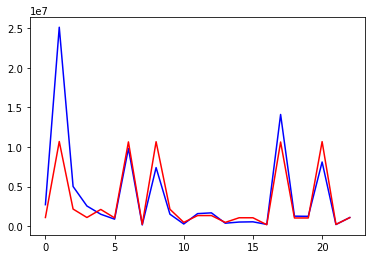

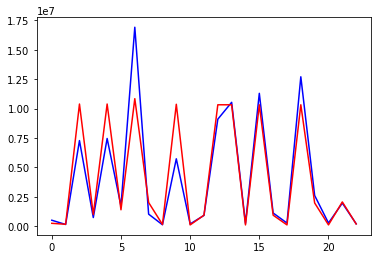

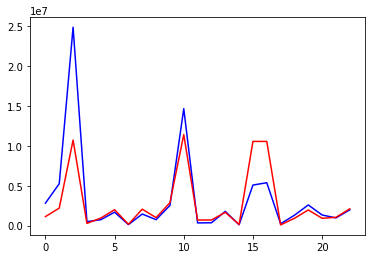

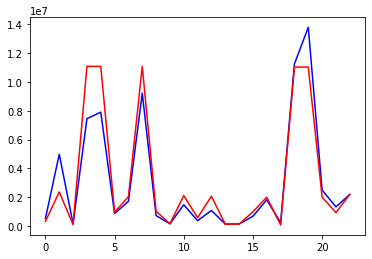

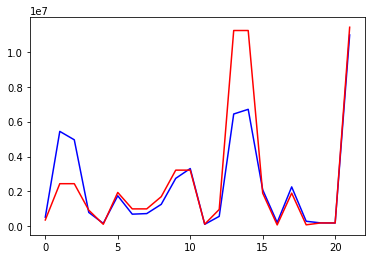

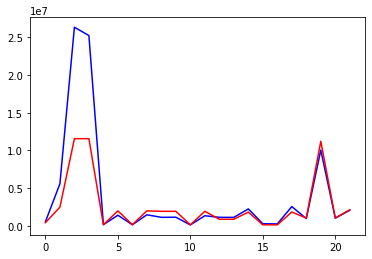

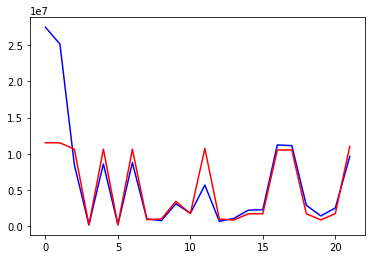

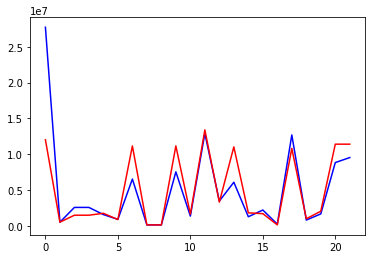

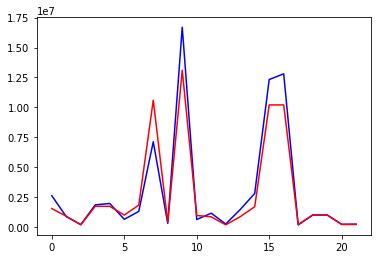

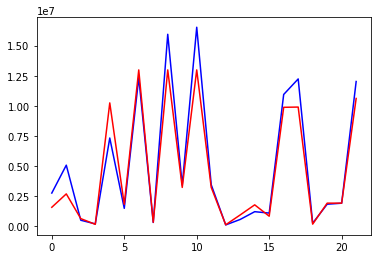

In [35]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in cv.split(X):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_2

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               11776     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 537,601
Trainable params: 537,601
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(201, 22) (23, 22) (201,) (23,)
Epoch 1/100
 - 1s - loss: 1859285.7979 - mae: 1859285.7500
Epoch 2/100
 - 0s - loss: 1443125.9380 - 

Epoch 19/100
 - 0s - loss: 1467508.5230 - mae: 1467508.7500
Epoch 20/100
 - 0s - loss: 1417451.2301 - mae: 1417451.1250
Epoch 21/100
 - 0s - loss: 1414666.6685 - mae: 1414666.5000
Epoch 22/100
 - 1s - loss: 1394918.1866 - mae: 1394918.2500
Epoch 23/100
 - 0s - loss: 1467829.7236 - mae: 1467829.6250
Epoch 24/100
 - 0s - loss: 1440436.1878 - mae: 1440436.0000
Epoch 25/100
 - 0s - loss: 1427762.7938 - mae: 1427762.7500
Epoch 26/100
 - 0s - loss: 1401228.1583 - mae: 1401228.2500
Epoch 27/100
 - 0s - loss: 1407701.4024 - mae: 1407701.3750
Epoch 28/100
 - 0s - loss: 1421278.3697 - mae: 1421278.2500
Epoch 29/100
 - 0s - loss: 1422750.8004 - mae: 1422750.6250
Epoch 30/100
 - 0s - loss: 1543450.2575 - mae: 1543450.2500
Epoch 31/100
 - 0s - loss: 1477706.5653 - mae: 1477706.6250
Epoch 32/100
 - 0s - loss: 1491861.9493 - mae: 1491861.7500
Epoch 33/100
 - 0s - loss: 1514592.3644 - mae: 1514592.3750
Epoch 34/100
 - 0s - loss: 1394240.0667 - mae: 1394240.0000
Epoch 35/100
 - 0s - loss: 1434263.1799 

Epoch 54/100
 - 0s - loss: 1276413.4684 - mae: 1276413.3750
Epoch 55/100
 - 0s - loss: 1280059.6259 - mae: 1280059.7500
Epoch 56/100
 - 0s - loss: 1403699.8657 - mae: 1403699.8750
Epoch 57/100
 - 0s - loss: 1347004.1169 - mae: 1347004.1250
Epoch 58/100
 - 0s - loss: 1442782.5883 - mae: 1442782.6250
Epoch 59/100
 - 0s - loss: 1436004.7500 - mae: 1436004.8750
Epoch 60/100
 - 0s - loss: 1290644.6045 - mae: 1290644.6250
Epoch 61/100
 - 0s - loss: 1277482.1475 - mae: 1277482.1250
Epoch 62/100
 - 0s - loss: 1368415.4506 - mae: 1368415.3750
Epoch 63/100
 - 1s - loss: 1315808.3947 - mae: 1315808.5000
Epoch 64/100
 - 0s - loss: 1460380.6912 - mae: 1460380.6250
Epoch 65/100
 - 0s - loss: 1378856.1135 - mae: 1378856.0000
Epoch 66/100
 - 0s - loss: 1371317.7826 - mae: 1371318.0000
Epoch 67/100
 - 0s - loss: 1358962.5465 - mae: 1358962.5000
Epoch 68/100
 - 0s - loss: 1362394.0112 - mae: 1362394.0000
Epoch 69/100
 - 0s - loss: 1353473.5957 - mae: 1353473.6250
Epoch 70/100
 - 0s - loss: 1336816.1471 

Epoch 89/100
 - 0s - loss: 1450343.1465 - mae: 1450343.1250
Epoch 90/100
 - 0s - loss: 1327897.1805 - mae: 1327897.1250
Epoch 91/100
 - 0s - loss: 1285516.2002 - mae: 1285516.1250
Epoch 92/100
 - 0s - loss: 1379498.4372 - mae: 1379498.3750
Epoch 93/100
 - 0s - loss: 1255325.2960 - mae: 1255325.2500
Epoch 94/100
 - 1s - loss: 1278362.1940 - mae: 1278362.2500
Epoch 95/100
 - 1s - loss: 1318517.5933 - mae: 1318517.6250
Epoch 96/100
 - 1s - loss: 1263276.9568 - mae: 1263277.0000
Epoch 97/100
 - 1s - loss: 1510190.4891 - mae: 1510190.6250
Epoch 98/100
 - 0s - loss: 1245340.0381 - mae: 1245340.0000
Epoch 99/100
 - 0s - loss: 1293179.5286 - mae: 1293179.5000
Epoch 100/100
 - 1s - loss: 1237172.9225 - mae: 1237172.8750
*******************Fold number************************:  5
(202, 22) (22, 22) (202,) (22,)
Epoch 1/100
 - 0s - loss: 1227989.8427 - mae: 1227989.7500
Epoch 2/100
 - 0s - loss: 1213366.4348 - mae: 1213366.6250
Epoch 3/100
 - 0s - loss: 1270643.2313 - mae: 1270643.2500
Epoch 4/100

 - 0s - loss: 1009831.4226 - mae: 1009831.4375
Epoch 24/100
 - 0s - loss: 1331284.9937 - mae: 1331285.1250
Epoch 25/100
 - 0s - loss: 1007698.0777 - mae: 1007698.0625
Epoch 26/100
 - 0s - loss: 1056016.2534 - mae: 1056016.3750
Epoch 27/100
 - 0s - loss: 1096990.9889 - mae: 1096991.0000
Epoch 28/100
 - 0s - loss: 1232872.2340 - mae: 1232872.3750
Epoch 29/100
 - 0s - loss: 1142053.4650 - mae: 1142053.5000
Epoch 30/100
 - 0s - loss: 947028.5834 - mae: 947028.5000
Epoch 31/100
 - 0s - loss: 1018184.9958 - mae: 1018184.9375
Epoch 32/100
 - 0s - loss: 1085364.5821 - mae: 1085364.6250
Epoch 33/100
 - 0s - loss: 977999.2073 - mae: 977999.3750
Epoch 34/100
 - 0s - loss: 979127.9479 - mae: 979127.9375
Epoch 35/100
 - 0s - loss: 1099388.0710 - mae: 1099388.0000
Epoch 36/100
 - 0s - loss: 974198.9100 - mae: 974198.8125
Epoch 37/100
 - 0s - loss: 962971.6573 - mae: 962971.7500
Epoch 38/100
 - 0s - loss: 1018431.9030 - mae: 1018431.8125
Epoch 39/100
 - 0s - loss: 1107627.4907 - mae: 1107627.5000
Epo

Epoch 62/100
 - 0s - loss: 926699.3228 - mae: 926699.3125
Epoch 63/100
 - 0s - loss: 741568.4208 - mae: 741568.5625
Epoch 64/100
 - 0s - loss: 617266.1590 - mae: 617266.1875
Epoch 65/100
 - 0s - loss: 757118.0678 - mae: 757118.1250
Epoch 66/100
 - 0s - loss: 779158.5915 - mae: 779158.5625
Epoch 67/100
 - 0s - loss: 918822.8411 - mae: 918822.8750
Epoch 68/100
 - 0s - loss: 538611.4039 - mae: 538611.3750
Epoch 69/100
 - 0s - loss: 723607.6275 - mae: 723607.6250
Epoch 70/100
 - 0s - loss: 588739.9123 - mae: 588739.9375
Epoch 71/100
 - 0s - loss: 628477.7047 - mae: 628477.6875
Epoch 72/100
 - 0s - loss: 631505.3565 - mae: 631505.3750
Epoch 73/100
 - 0s - loss: 575574.9114 - mae: 575574.9375
Epoch 74/100
 - 0s - loss: 563377.3077 - mae: 563377.3125
Epoch 75/100
 - 0s - loss: 497723.8417 - mae: 497723.8125
Epoch 76/100
 - 0s - loss: 732312.9336 - mae: 732312.9375
Epoch 77/100
 - 0s - loss: 915651.8528 - mae: 915651.7500
Epoch 78/100
 - 0s - loss: 769972.3080 - mae: 769972.2500
Epoch 79/100
 

*******************Fold number************************:  9
(202, 22) (22, 22) (202,) (22,)
Epoch 1/100
 - 0s - loss: 1343576.3272 - mae: 1343576.2500
Epoch 2/100
 - 0s - loss: 1240983.1185 - mae: 1240983.0000
Epoch 3/100
 - 0s - loss: 1168255.5207 - mae: 1168255.5000
Epoch 4/100
 - 0s - loss: 720338.1173 - mae: 720338.0625
Epoch 5/100
 - 0s - loss: 823614.8217 - mae: 823614.8125
Epoch 6/100
 - 0s - loss: 817142.4319 - mae: 817142.5000
Epoch 7/100
 - 0s - loss: 582507.6048 - mae: 582507.5625
Epoch 8/100
 - 0s - loss: 590750.0161 - mae: 590750.1250
Epoch 9/100
 - 0s - loss: 532041.9519 - mae: 532042.0000
Epoch 10/100
 - 0s - loss: 602367.2537 - mae: 602367.2500
Epoch 11/100
 - 0s - loss: 686173.7269 - mae: 686173.8125
Epoch 12/100
 - 0s - loss: 1134283.7882 - mae: 1134283.7500
Epoch 13/100
 - 0s - loss: 512702.1101 - mae: 512702.0938
Epoch 14/100
 - 0s - loss: 655082.5898 - mae: 655082.5625
Epoch 15/100
 - 0s - loss: 595214.5712 - mae: 595214.5625
Epoch 16/100
 - 0s - loss: 601349.4185 -

Epoch 39/100
 - 0s - loss: 1182964.6064 - mae: 1182964.6250
Epoch 40/100
 - 0s - loss: 564489.6802 - mae: 564489.6875
Epoch 41/100
 - 0s - loss: 588555.9489 - mae: 588555.9375
Epoch 42/100
 - 0s - loss: 496579.0030 - mae: 496579.0625
Epoch 43/100
 - 0s - loss: 417835.3186 - mae: 417835.2812
Epoch 44/100
 - 0s - loss: 623192.0063 - mae: 623192.0625
Epoch 45/100
 - 0s - loss: 746641.0981 - mae: 746641.1250
Epoch 46/100
 - 0s - loss: 807849.2864 - mae: 807849.3750
Epoch 47/100
 - 0s - loss: 504469.1658 - mae: 504469.1562
Epoch 48/100
 - 0s - loss: 524295.2742 - mae: 524295.2500
Epoch 49/100
 - 0s - loss: 517368.0166 - mae: 517367.9062
Epoch 50/100
 - 0s - loss: 419290.0268 - mae: 419290.0312
Epoch 51/100
 - 0s - loss: 547147.3416 - mae: 547147.3750
Epoch 52/100
 - 0s - loss: 872285.4926 - mae: 872285.4375
Epoch 53/100
 - 0s - loss: 693403.1747 - mae: 693403.1875
Epoch 54/100
 - 0s - loss: 456946.2314 - mae: 456946.2188
Epoch 55/100
 - 0s - loss: 422322.6574 - mae: 422322.6562
Epoch 56/100

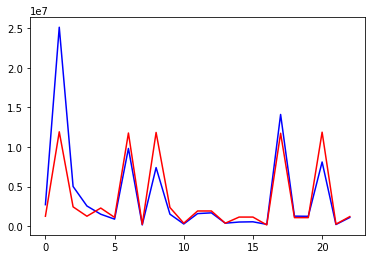

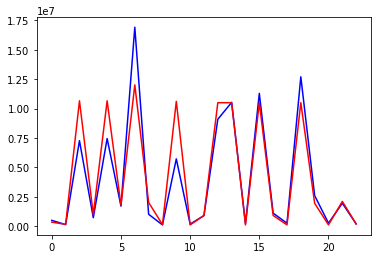

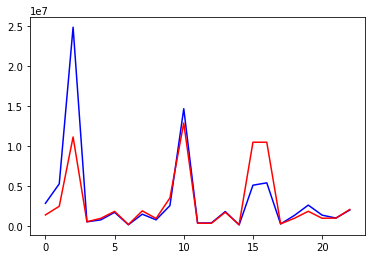

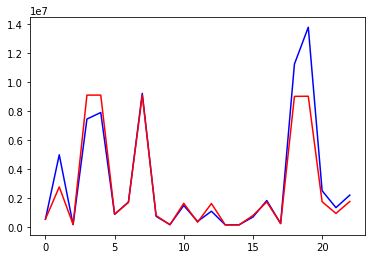

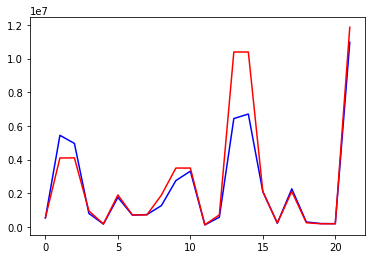

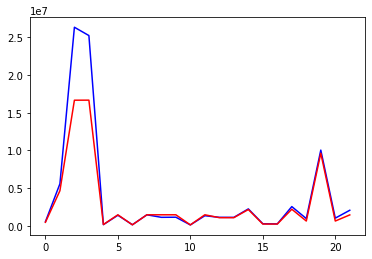

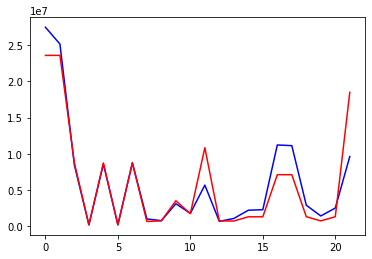

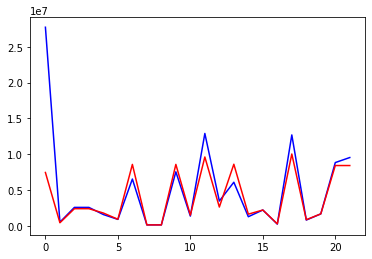

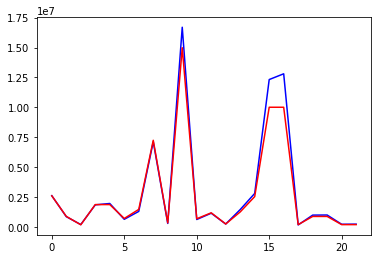

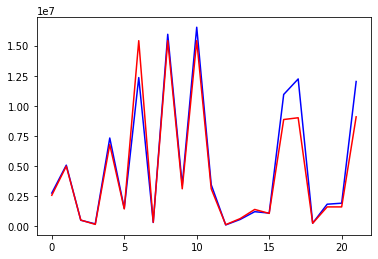

In [36]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1 
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               5888      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 23,449
Trainable params: 23,449
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(2

Epoch 17/100
 - 0s - loss: 1445601.5524 - mae: 1445601.6250
Epoch 18/100
 - 0s - loss: 1435495.8789 - mae: 1435495.7500
Epoch 19/100
 - 0s - loss: 1425849.8916 - mae: 1425849.7500
Epoch 20/100
 - 0s - loss: 1417173.2483 - mae: 1417173.5000
Epoch 21/100
 - 0s - loss: 1515483.6828 - mae: 1515483.8750
Epoch 22/100
 - 0s - loss: 1465288.5938 - mae: 1465288.6250
Epoch 23/100
 - 0s - loss: 1416529.8207 - mae: 1416529.8750
Epoch 24/100
 - 0s - loss: 1422430.7161 - mae: 1422430.8750
Epoch 25/100
 - 0s - loss: 1445621.7478 - mae: 1445621.6250
Epoch 26/100
 - 0s - loss: 1424541.2572 - mae: 1424541.2500
Epoch 27/100
 - 0s - loss: 1419916.4712 - mae: 1419916.6250
Epoch 28/100
 - 0s - loss: 1416861.6981 - mae: 1416861.7500
Epoch 29/100
 - 0s - loss: 1436297.7817 - mae: 1436297.7500
Epoch 30/100
 - 0s - loss: 1555557.2966 - mae: 1555557.2500
Epoch 31/100
 - 0s - loss: 1493252.4300 - mae: 1493252.5000
Epoch 32/100
 - 0s - loss: 1434177.6402 - mae: 1434177.6250
Epoch 33/100
 - 0s - loss: 1437726.4618 

Epoch 52/100
 - 0s - loss: 1315197.9414 - mae: 1315197.8750
Epoch 53/100
 - 0s - loss: 1309304.2635 - mae: 1309304.1250
Epoch 54/100
 - 0s - loss: 1326233.6884 - mae: 1326233.7500
Epoch 55/100
 - 0s - loss: 1378954.4080 - mae: 1378954.2500
Epoch 56/100
 - 0s - loss: 1340433.7208 - mae: 1340433.6250
Epoch 57/100
 - 0s - loss: 1318040.4377 - mae: 1318040.3750
Epoch 58/100
 - 0s - loss: 1319516.2111 - mae: 1319516.1250
Epoch 59/100
 - 0s - loss: 1305782.3943 - mae: 1305782.3750
Epoch 60/100
 - 0s - loss: 1336993.9961 - mae: 1336994.1250
Epoch 61/100
 - 0s - loss: 1308589.3636 - mae: 1308589.3750
Epoch 62/100
 - 0s - loss: 1318720.2668 - mae: 1318720.3750
Epoch 63/100
 - 0s - loss: 1352733.6981 - mae: 1352733.6250
Epoch 64/100
 - 0s - loss: 1363690.0100 - mae: 1363690.0000
Epoch 65/100
 - 0s - loss: 1368373.7360 - mae: 1368373.6250
Epoch 66/100
 - 0s - loss: 1304741.6073 - mae: 1304741.6250
Epoch 67/100
 - 0s - loss: 1317584.7985 - mae: 1317584.8750
Epoch 68/100
 - 0s - loss: 1329595.8022 

Epoch 87/100
 - 0s - loss: 1482642.3769 - mae: 1482642.2500
Epoch 88/100
 - 0s - loss: 1351415.9963 - mae: 1351416.0000
Epoch 89/100
 - 0s - loss: 1337109.2973 - mae: 1337109.3750
Epoch 90/100
 - 0s - loss: 1334273.2463 - mae: 1334273.2500
Epoch 91/100
 - 0s - loss: 1387227.3402 - mae: 1387227.2500
Epoch 92/100
 - 0s - loss: 1337001.0258 - mae: 1337001.1250
Epoch 93/100
 - 0s - loss: 1455677.0166 - mae: 1455677.2500
Epoch 94/100
 - 0s - loss: 1353207.0871 - mae: 1353207.2500
Epoch 95/100
 - 0s - loss: 1498959.1486 - mae: 1498959.1250
Epoch 96/100
 - 0s - loss: 1577675.5597 - mae: 1577675.6250
Epoch 97/100
 - 0s - loss: 1366002.2948 - mae: 1366002.5000
Epoch 98/100
 - 0s - loss: 1411065.2304 - mae: 1411065.1250
Epoch 99/100
 - 0s - loss: 1343925.1592 - mae: 1343925.1250
Epoch 100/100
 - 0s - loss: 1330768.9719 - mae: 1330769.0000
*******************Fold number************************:  5
(202, 22) (22, 22) (202,) (22,)
Epoch 1/100
 - 0s - loss: 1366656.0476 - mae: 1366656.1250
Epoch 2/1

Epoch 21/100
 - 0s - loss: 1132168.1134 - mae: 1132168.1250
Epoch 22/100
 - 0s - loss: 1215921.6877 - mae: 1215921.6250
Epoch 23/100
 - 0s - loss: 1157182.3122 - mae: 1157182.3750
Epoch 24/100
 - 0s - loss: 1145247.6394 - mae: 1145247.8750
Epoch 25/100
 - 0s - loss: 1146989.5188 - mae: 1146989.5000
Epoch 26/100
 - 0s - loss: 1157522.8871 - mae: 1157522.8750
Epoch 27/100
 - 0s - loss: 1192023.8192 - mae: 1192023.6250
Epoch 28/100
 - 0s - loss: 1176007.6567 - mae: 1176007.7500
Epoch 29/100
 - 0s - loss: 1208253.0478 - mae: 1208253.1250
Epoch 30/100
 - 0s - loss: 1365996.1429 - mae: 1365996.2500
Epoch 31/100
 - 0s - loss: 1185004.2088 - mae: 1185004.2500
Epoch 32/100
 - 0s - loss: 1152699.7958 - mae: 1152699.7500
Epoch 33/100
 - 0s - loss: 1175841.6344 - mae: 1175841.5000
Epoch 34/100
 - 0s - loss: 1133624.6473 - mae: 1133624.5000
Epoch 35/100
 - 0s - loss: 1217640.9242 - mae: 1217640.7500
Epoch 36/100
 - 0s - loss: 1139653.1236 - mae: 1139653.1250
Epoch 37/100
 - 0s - loss: 1168604.6686 

Epoch 56/100
 - 0s - loss: 1071661.1399 - mae: 1071661.2500
Epoch 57/100
 - 0s - loss: 991721.3694 - mae: 991721.3750
Epoch 58/100
 - 0s - loss: 1021995.1968 - mae: 1021995.2500
Epoch 59/100
 - 0s - loss: 1070671.3178 - mae: 1070671.2500
Epoch 60/100
 - 0s - loss: 1198754.1303 - mae: 1198754.2500
Epoch 61/100
 - 0s - loss: 1186356.1976 - mae: 1186356.0000
Epoch 62/100
 - 0s - loss: 1323929.8855 - mae: 1323929.8750
Epoch 63/100
 - 0s - loss: 1078421.0955 - mae: 1078421.1250
Epoch 64/100
 - 0s - loss: 1083361.4437 - mae: 1083361.3750
Epoch 65/100
 - 0s - loss: 1154272.3529 - mae: 1154272.3750
Epoch 66/100
 - 0s - loss: 1028557.6952 - mae: 1028557.5625
Epoch 67/100
 - 0s - loss: 1008814.6528 - mae: 1008814.5625
Epoch 68/100
 - 0s - loss: 999474.6822 - mae: 999474.6250
Epoch 69/100
 - 0s - loss: 998576.6071 - mae: 998576.6250
Epoch 70/100
 - 0s - loss: 998613.5346 - mae: 998613.5625
Epoch 71/100
 - 0s - loss: 1053945.2633 - mae: 1053945.3750
Epoch 72/100
 - 0s - loss: 1085477.9080 - mae: 1

Epoch 94/100
 - 0s - loss: 844301.9141 - mae: 844301.9375
Epoch 95/100
 - 0s - loss: 878612.2644 - mae: 878612.2500
Epoch 96/100
 - 0s - loss: 827164.9248 - mae: 827164.9375
Epoch 97/100
 - 0s - loss: 910667.1977 - mae: 910667.1875
Epoch 98/100
 - 0s - loss: 794854.8239 - mae: 794854.8750
Epoch 99/100
 - 0s - loss: 983261.8444 - mae: 983261.8750
Epoch 100/100
 - 0s - loss: 984894.3417 - mae: 984894.3125
*******************Fold number************************:  9
(202, 22) (22, 22) (202,) (22,)
Epoch 1/100
 - 0s - loss: 983919.5102 - mae: 983919.5000
Epoch 2/100
 - 0s - loss: 995814.7197 - mae: 995814.6250
Epoch 3/100
 - 0s - loss: 948972.6425 - mae: 948972.6250
Epoch 4/100
 - 0s - loss: 953259.3066 - mae: 953259.2500
Epoch 5/100
 - 0s - loss: 866981.3735 - mae: 866981.3750
Epoch 6/100
 - 0s - loss: 888430.5739 - mae: 888430.4375
Epoch 7/100
 - 0s - loss: 866101.1810 - mae: 866101.1250
Epoch 8/100
 - 0s - loss: 1019252.8841 - mae: 1019252.8125
Epoch 9/100
 - 0s - loss: 1021974.5493 - mae

Epoch 31/100
 - 0s - loss: 909876.8956 - mae: 909877.0000
Epoch 32/100
 - 0s - loss: 817174.2724 - mae: 817174.1875
Epoch 33/100
 - 0s - loss: 836121.3820 - mae: 836121.2500
Epoch 34/100
 - 0s - loss: 777075.3014 - mae: 777075.3125
Epoch 35/100
 - 0s - loss: 876790.3736 - mae: 876790.2500
Epoch 36/100
 - 0s - loss: 733663.5659 - mae: 733663.5000
Epoch 37/100
 - 0s - loss: 722021.8342 - mae: 722021.8750
Epoch 38/100
 - 0s - loss: 771866.4086 - mae: 771866.3750
Epoch 39/100
 - 0s - loss: 772593.2755 - mae: 772593.3750
Epoch 40/100
 - 0s - loss: 743885.7157 - mae: 743885.6875
Epoch 41/100
 - 0s - loss: 693200.5520 - mae: 693200.5625
Epoch 42/100
 - 0s - loss: 751394.0176 - mae: 751394.0000
Epoch 43/100
 - 0s - loss: 886609.6505 - mae: 886609.7500
Epoch 44/100
 - 0s - loss: 679804.0623 - mae: 679804.0625
Epoch 45/100
 - 0s - loss: 674066.6447 - mae: 674066.6250
Epoch 46/100
 - 0s - loss: 894376.0924 - mae: 894376.0000
Epoch 47/100
 - 0s - loss: 817233.3336 - mae: 817233.3750
Epoch 48/100
 

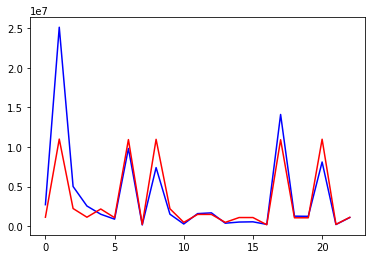

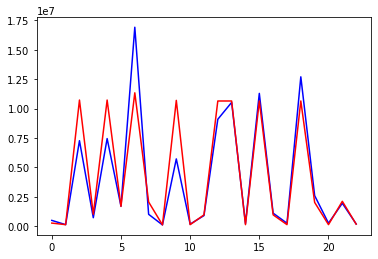

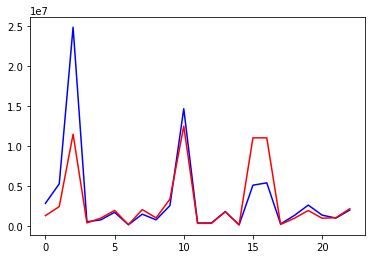

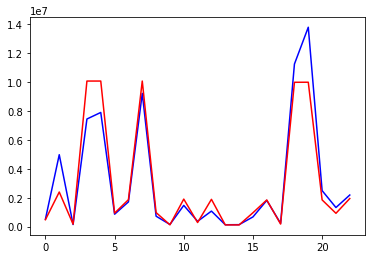

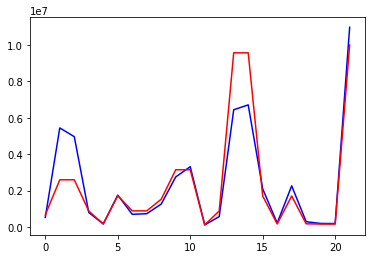

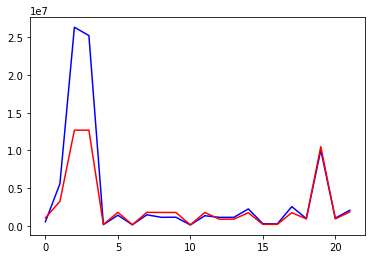

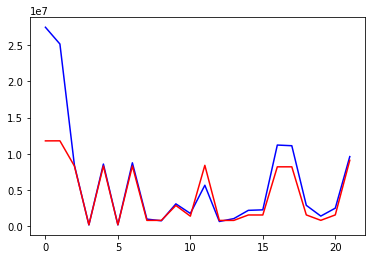

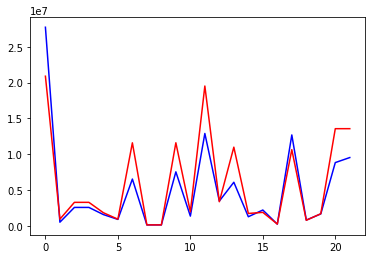

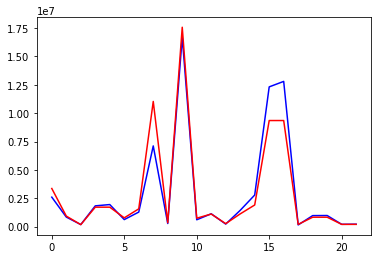

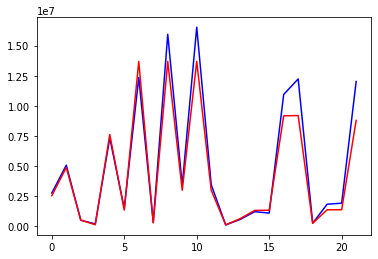

In [37]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=22, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 

# DNN_4

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               11776     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 3         
Total params: 81,853
Trainable params: 81,853
Non-trainable params: 0
__________________________________________________

Epoch 15/100
 - 0s - loss: 1423504.0223 - mae: 1423504.2500
Epoch 16/100
 - 0s - loss: 1419630.2612 - mae: 1419630.1250
Epoch 17/100
 - 0s - loss: 1413438.4462 - mae: 1413438.6250
Epoch 18/100
 - 0s - loss: 1427787.5718 - mae: 1427787.7500
Epoch 19/100
 - 0s - loss: 1431233.9443 - mae: 1431233.8750
Epoch 20/100
 - 0s - loss: 1421717.1141 - mae: 1421717.0000
Epoch 21/100
 - 0s - loss: 1417813.7607 - mae: 1417813.6250
Epoch 22/100
 - 0s - loss: 1411692.3384 - mae: 1411692.6250
Epoch 23/100
 - 0s - loss: 1409178.1405 - mae: 1409178.0000
Epoch 24/100
 - 0s - loss: 1410312.0606 - mae: 1410312.1250
Epoch 25/100
 - 0s - loss: 1410698.7690 - mae: 1410698.6250
Epoch 26/100
 - 0s - loss: 1418455.1210 - mae: 1418455.2500
Epoch 27/100
 - 0s - loss: 1440146.0486 - mae: 1440145.8750
Epoch 28/100
 - 0s - loss: 1432429.5246 - mae: 1432429.3750
Epoch 29/100
 - 0s - loss: 1414946.7534 - mae: 1414946.8750
Epoch 30/100
 - 0s - loss: 1562320.9837 - mae: 1562320.7500
Epoch 31/100
 - 0s - loss: 1438258.3386 

Epoch 50/100
 - 0s - loss: 1324938.3105 - mae: 1324938.3750
Epoch 51/100
 - 0s - loss: 1317369.4873 - mae: 1317369.5000
Epoch 52/100
 - 0s - loss: 1314560.6813 - mae: 1314560.7500
Epoch 53/100
 - 0s - loss: 1328357.0585 - mae: 1328356.8750
Epoch 54/100
 - 0s - loss: 1355447.1530 - mae: 1355446.8750
Epoch 55/100
 - 0s - loss: 1363157.0351 - mae: 1363157.0000
Epoch 56/100
 - 0s - loss: 1315725.2718 - mae: 1315725.3750
Epoch 57/100
 - 0s - loss: 1308183.4997 - mae: 1308183.5000
Epoch 58/100
 - 0s - loss: 1323624.0180 - mae: 1323624.0000
Epoch 59/100
 - 0s - loss: 1302446.1576 - mae: 1302445.8750
Epoch 60/100
 - 0s - loss: 1423126.2914 - mae: 1423126.5000
Epoch 61/100
 - 0s - loss: 1319087.8691 - mae: 1319087.8750
Epoch 62/100
 - 0s - loss: 1309180.8455 - mae: 1309180.8750
Epoch 63/100
 - 0s - loss: 1407114.8907 - mae: 1407115.1250
Epoch 64/100
 - 0s - loss: 1426626.9557 - mae: 1426627.0000
Epoch 65/100
 - 0s - loss: 1439442.3159 - mae: 1439442.2500
Epoch 66/100
 - 0s - loss: 1337941.4478 

Epoch 85/100
 - 0s - loss: 1389398.1154 - mae: 1389398.1250
Epoch 86/100
 - 0s - loss: 1434593.5690 - mae: 1434593.6250
Epoch 87/100
 - 0s - loss: 1353607.5973 - mae: 1353607.5000
Epoch 88/100
 - 0s - loss: 1343276.2366 - mae: 1343276.2500
Epoch 89/100
 - 0s - loss: 1338092.6886 - mae: 1338092.6250
Epoch 90/100
 - 0s - loss: 1389715.5681 - mae: 1389715.6250
Epoch 91/100
 - 0s - loss: 1349007.4447 - mae: 1349007.6250
Epoch 92/100
 - 0s - loss: 1361264.7183 - mae: 1361264.8750
Epoch 93/100
 - 0s - loss: 1360462.9369 - mae: 1360463.0000
Epoch 94/100
 - 0s - loss: 1379537.8141 - mae: 1379538.0000
Epoch 95/100
 - 0s - loss: 1366390.8165 - mae: 1366390.8750
Epoch 96/100
 - 0s - loss: 1344369.0193 - mae: 1344369.0000
Epoch 97/100
 - 0s - loss: 1363168.1853 - mae: 1363168.1250
Epoch 98/100
 - 0s - loss: 1332420.1483 - mae: 1332420.2500
Epoch 99/100
 - 0s - loss: 1338336.7968 - mae: 1338336.6250
Epoch 100/100
 - 0s - loss: 1386131.7329 - mae: 1386131.8750
*******************Fold number*********

Epoch 19/100
 - 0s - loss: 1173916.4056 - mae: 1173916.3750
Epoch 20/100
 - 0s - loss: 1178595.4162 - mae: 1178595.3750
Epoch 21/100
 - 0s - loss: 1189885.3450 - mae: 1189885.2500
Epoch 22/100
 - 0s - loss: 1178042.3489 - mae: 1178042.3750
Epoch 23/100
 - 0s - loss: 1177364.0817 - mae: 1177364.0000
Epoch 24/100
 - 0s - loss: 1168787.8212 - mae: 1168787.8750
Epoch 25/100
 - 0s - loss: 1228265.2153 - mae: 1228265.2500
Epoch 26/100
 - 0s - loss: 1173382.6392 - mae: 1173382.6250
Epoch 27/100
 - 0s - loss: 1317606.3397 - mae: 1317606.2500
Epoch 28/100
 - 0s - loss: 1161426.3376 - mae: 1161426.2500
Epoch 29/100
 - 0s - loss: 1223547.9299 - mae: 1223547.7500
Epoch 30/100
 - 0s - loss: 1174674.7438 - mae: 1174674.6250
Epoch 31/100
 - 0s - loss: 1198165.8345 - mae: 1198165.7500
Epoch 32/100
 - 0s - loss: 1180681.3861 - mae: 1180681.3750
Epoch 33/100
 - 0s - loss: 1137401.9152 - mae: 1137402.0000
Epoch 34/100
 - 0s - loss: 1209225.3017 - mae: 1209225.2500
Epoch 35/100
 - 0s - loss: 1208594.6627 

Epoch 54/100
 - 0s - loss: 1200567.6578 - mae: 1200567.6250
Epoch 55/100
 - 0s - loss: 1083494.5523 - mae: 1083494.5000
Epoch 56/100
 - 0s - loss: 1134148.9964 - mae: 1134149.0000
Epoch 57/100
 - 0s - loss: 1034882.7141 - mae: 1034882.6875
Epoch 58/100
 - 0s - loss: 1095126.7432 - mae: 1095126.6250
Epoch 59/100
 - 0s - loss: 1058414.7760 - mae: 1058414.7500
Epoch 60/100
 - 0s - loss: 1076851.6330 - mae: 1076851.6250
Epoch 61/100
 - 0s - loss: 979129.6470 - mae: 979129.6875
Epoch 62/100
 - 0s - loss: 1064619.9489 - mae: 1064619.8750
Epoch 63/100
 - 0s - loss: 1052019.3988 - mae: 1052019.3750
Epoch 64/100
 - 0s - loss: 985165.3809 - mae: 985165.3750
Epoch 65/100
 - 0s - loss: 997116.0356 - mae: 997116.0625
Epoch 66/100
 - 0s - loss: 983482.3110 - mae: 983482.3125
Epoch 67/100
 - 0s - loss: 985217.0471 - mae: 985217.0000
Epoch 68/100
 - 0s - loss: 1016527.1265 - mae: 1016527.1250
Epoch 69/100
 - 0s - loss: 1161116.4288 - mae: 1161116.3750
Epoch 70/100
 - 0s - loss: 1051745.8772 - mae: 105

Epoch 91/100
 - 0s - loss: 1052548.4140 - mae: 1052548.5000
Epoch 92/100
 - 0s - loss: 1087830.0637 - mae: 1087830.1250
Epoch 93/100
 - 0s - loss: 1179305.3133 - mae: 1179305.2500
Epoch 94/100
 - 0s - loss: 1138312.4149 - mae: 1138312.3750
Epoch 95/100
 - 0s - loss: 956571.2963 - mae: 956571.3125
Epoch 96/100
 - 0s - loss: 920096.4273 - mae: 920096.3125
Epoch 97/100
 - 0s - loss: 1116112.2237 - mae: 1116112.1250
Epoch 98/100
 - 0s - loss: 851292.4087 - mae: 851292.5000
Epoch 99/100
 - 0s - loss: 836771.8107 - mae: 836771.8125
Epoch 100/100
 - 0s - loss: 878955.7386 - mae: 878955.8125
*******************Fold number************************:  9
(202, 22) (22, 22) (202,) (22,)
Epoch 1/100
 - 0s - loss: 929047.6436 - mae: 929047.6875
Epoch 2/100
 - 0s - loss: 958148.3482 - mae: 958148.2500
Epoch 3/100
 - 0s - loss: 1090927.9066 - mae: 1090927.8750
Epoch 4/100
 - 0s - loss: 1276991.1912 - mae: 1276991.3750
Epoch 5/100
 - 0s - loss: 1291979.4762 - mae: 1291979.5000
Epoch 6/100
 - 0s - loss: 1

Epoch 28/100
 - 0s - loss: 884851.7205 - mae: 884851.8125
Epoch 29/100
 - 0s - loss: 922060.8071 - mae: 922060.8125
Epoch 30/100
 - 0s - loss: 815060.0415 - mae: 815059.9375
Epoch 31/100
 - 0s - loss: 730453.2817 - mae: 730453.3750
Epoch 32/100
 - 0s - loss: 791487.2830 - mae: 791487.3125
Epoch 33/100
 - 0s - loss: 786481.0138 - mae: 786481.1250
Epoch 34/100
 - 0s - loss: 725936.6824 - mae: 725936.6250
Epoch 35/100
 - 0s - loss: 828296.8979 - mae: 828296.9375
Epoch 36/100
 - 0s - loss: 946343.4431 - mae: 946343.4375
Epoch 37/100
 - 0s - loss: 829686.7619 - mae: 829686.8125
Epoch 38/100
 - 0s - loss: 913383.2208 - mae: 913383.1875
Epoch 39/100
 - 0s - loss: 1143584.0417 - mae: 1143584.0000
Epoch 40/100
 - 0s - loss: 850943.8355 - mae: 850943.7500
Epoch 41/100
 - 0s - loss: 716402.0208 - mae: 716402.0000
Epoch 42/100
 - 0s - loss: 1023214.6813 - mae: 1023214.8125
Epoch 43/100
 - 0s - loss: 1126561.3852 - mae: 1126561.3750
Epoch 44/100
 - 0s - loss: 968452.6883 - mae: 968452.6250
Epoch 45

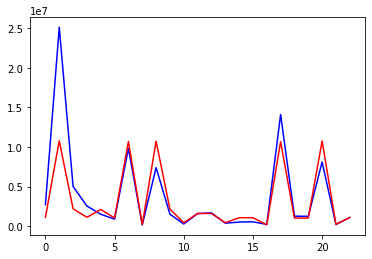

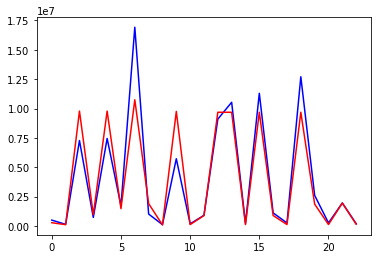

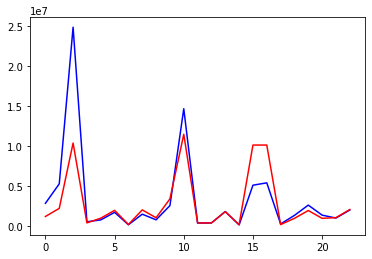

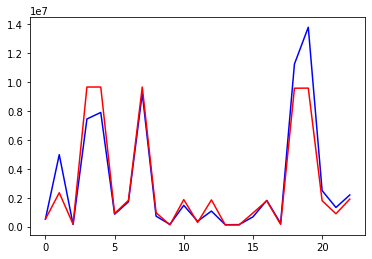

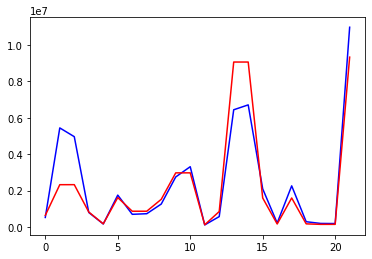

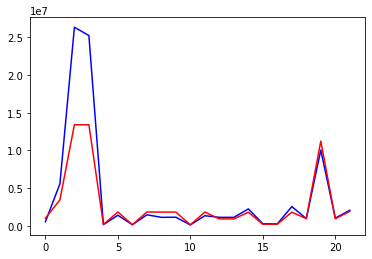

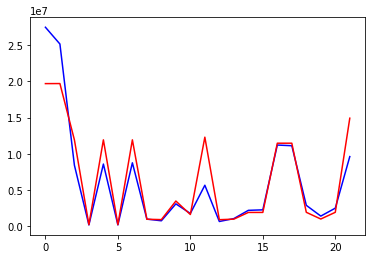

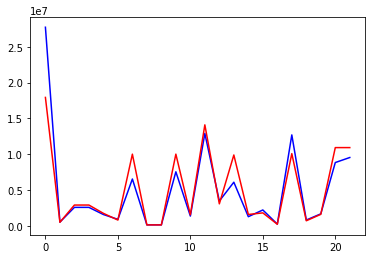

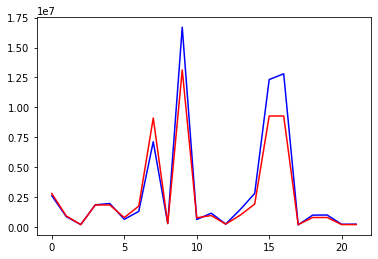

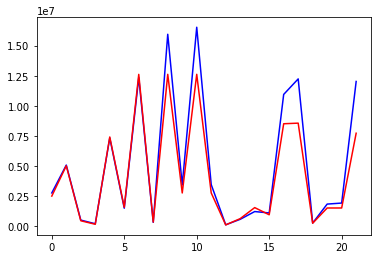

In [38]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(2,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 